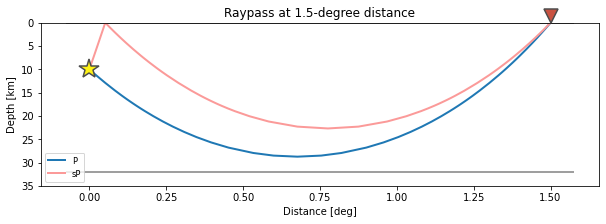

<AxesSubplot:title={'center':'Raypass at 1.5-degree distance'}, xlabel='Distance [deg]', ylabel='Depth [km]'>

In [1]:
### Sythetics for sP traveltime using obspy.taup
from obspy.taup.taup_create import build_taup_model
from obspy.taup import TauPyModel
import matplotlib.pyplot as plt

# build_taup_model("./SingLayer.nd", output_folder="./")
model = TauPyModel("./SingLayer.npz")

arrivals1 = model.get_ray_paths(source_depth_in_km=10, distance_in_degree=1.5, phase_list=['sP','P'])

fig, ax = plt.subplots(figsize=(10, 3))
ax.set_ylim(-0,35)
ax.set_title("Raypass at 1.5-degree distance")
ax.invert_yaxis()
arrivals1.plot_rays(plot_type='cartesian', fig=fig, ax=ax, legend=True)


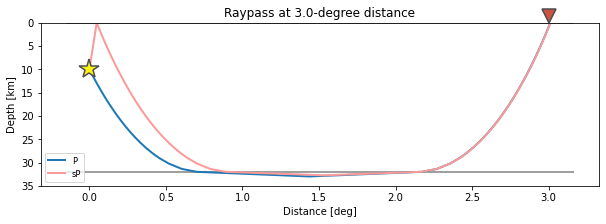

<AxesSubplot:title={'center':'Raypass at 3.0-degree distance'}, xlabel='Distance [deg]', ylabel='Depth [km]'>

In [2]:
arrivals3 = model.get_ray_paths(source_depth_in_km=10, distance_in_degree=3, phase_list=['sP','P'])

fig, ax = plt.subplots(figsize=(10, 3))
ax.set_title("Raypass at 3.0-degree distance")
ax.set_ylim(-0,35)
ax.invert_yaxis()
arrivals3.plot_rays(plot_type='cartesian', fig=fig, ax=ax, legend=True)

In [3]:
import numpy as np
distance = []
TP = []
TsP = []
for dist in np.arange(0.1,4.1,0.1):
    distance.append(dist*110)
    TP.append(model.get_travel_times(source_depth_in_km=10, distance_in_degree=dist, phase_list=["p","P"])[0].time)
    TsP.append(model.get_travel_times(source_depth_in_km=10, distance_in_degree=dist, phase_list=["sP"])[0].time)

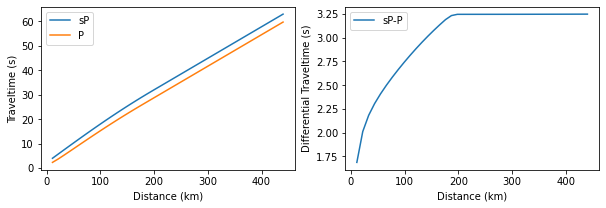

In [4]:
import matplotlib.pyplot as plt

plt.subplots(figsize=(10, 3))
plt.subplot(1, 2, 1)
plt.plot(distance,TsP,label="sP")
plt.plot(distance,TP, label="P")
plt.xlabel('Distance (km)')
plt.ylabel('Traveltime (s)')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(distance,np.array(TsP)-np.array(TP),label="sP-P")
plt.xlabel('Distance (km)')
plt.ylabel('Differential Traveltime (s)')
plt.legend()

plt.show()